## Importing Required Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Inspecting the Dataset

In [166]:
elec = pd.read_csv('Assignment1_Dataset.csv')
elec.head()

,"Timestamp,Energy_kWh"
0,"2025-01-01 00:00:00,4.2"
1,"2025-01-01 00:15:00,3.8"
2,"01-01-2025 00:30:00,3.9"
3,"2025-01-01 00:45:00,"
4,"2025-01-01 01:00:00,4.5"


In [167]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp,Energy_kWh  20 non-null     object
dtypes: object(1)
memory usage: 292.0+ bytes


## Standardizing Time thus Timestamp to Datetime

In [168]:
elec[['Timestamp', 'Energy_kWh']] = elec['Timestamp,Energy_kWh'].str.split(',', expand=True)
elec['Timestamp'] = pd.to_datetime(elec['Timestamp'], format='mixed', dayfirst=True)
elec = elec.drop(columns=['Timestamp,Energy_kWh'])
elec = elec.sort_values('Timestamp')
elec.head()

,Timestamp,Energy_kWh
0,2025-01-01 00:00:00,4.2
1,2025-01-01 00:15:00,3.8
2,2025-01-01 00:30:00,3.9
3,2025-01-01 00:45:00,
4,2025-01-01 01:00:00,4.5


 The dataset  does not have a column named 'Timestamp'. So, I added code to split this combined column into two separate columns, 'Timestamp' and 'Energy_kWh', converted the new 'Timestamp' column to the correct datetime format, and then drop the original combined column.



## Setting Timestamp as Index

In [169]:
elec.set_index('Timestamp', inplace=True)


## Handling  Missing Time Intervals using Interpolation

Creating a continuous hourly time index as the first thing

In [170]:
full_time_index = pd.date_range(
    start=elec.index.min(),
    end=elec.index.max(),
    freq='h'
)


Secondly, reindexing and interpolating

In [171]:
elec = elec.reindex(full_time_index)
elec['Energy_kWh'] = pd.to_numeric(elec['Energy_kWh'], errors='coerce')
elec['Energy_kWh'] = elec['Energy_kWh'].interpolate(method='linear')

The missing time intervals in the Energy_kWh column have been handled by converting the column to a numeric type and then interpolating the missing values linearly.

## Resampling: Daily Mean Consumption

In [172]:
daily_elec = elec.resample('D').mean()
daily_elec.head()


,Energy_kWh
2025-01-01,3.453289
2025-01-02,4.382456
2025-01-03,5.571754
2025-01-04,6.780000


## Feature Engineering
This is to help identify behavioral patterns


In [173]:
daily_elec['Day_of_Week'] = daily_elec.index.day_name()
daily_elec['Is_Weekend'] = daily_elec.index.weekday >= 5


#  Phase 2: Visualization

###Seasonal View

In [174]:
daily_elec['Rolling_7D'] = daily_elec['Energy_kWh'].rolling(window=7, min_periods=1).mean()

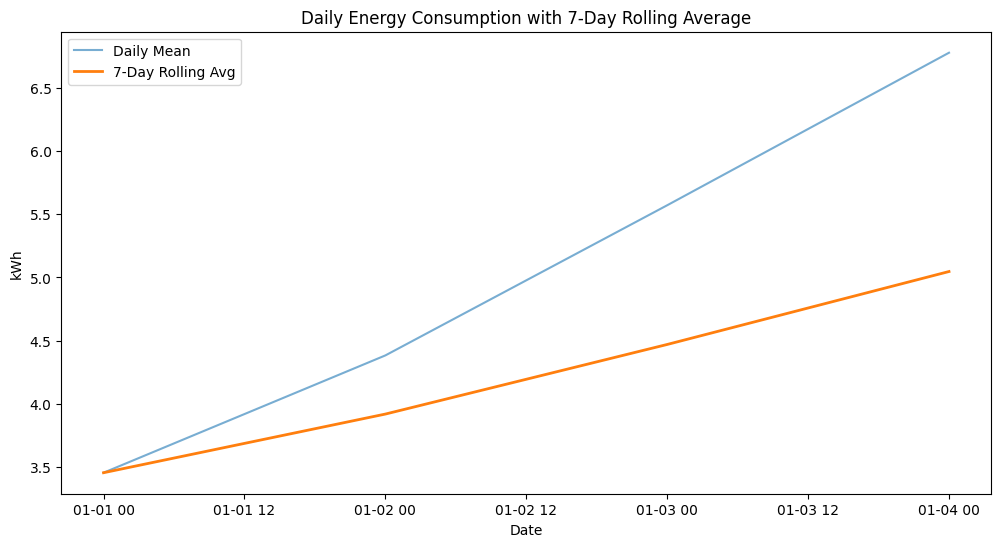

In [175]:
plt.figure(figsize=(12,6))
plt.plot(daily_elec.index, daily_elec['Energy_kWh'], label='Daily Mean', alpha=0.6)
plt.plot(daily_elec.index, daily_elec['Rolling_7D'], label='7-Day Rolling Avg', linewidth=2)
plt.title("Daily Energy Consumption with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.legend()
plt.show()

###Behavioral View: Heatmap (Hour vs Day of Week)

Preparing hourly features

In [176]:
elec['Hour'] = elec.index.hour
elec['Day_of_Week'] = elec.index.day_name()


In [177]:
pivot = elec.pivot_table(
    values='Energy_kWh',
    index='Hour',
    columns='Day_of_Week',
    aggfunc='mean'
)


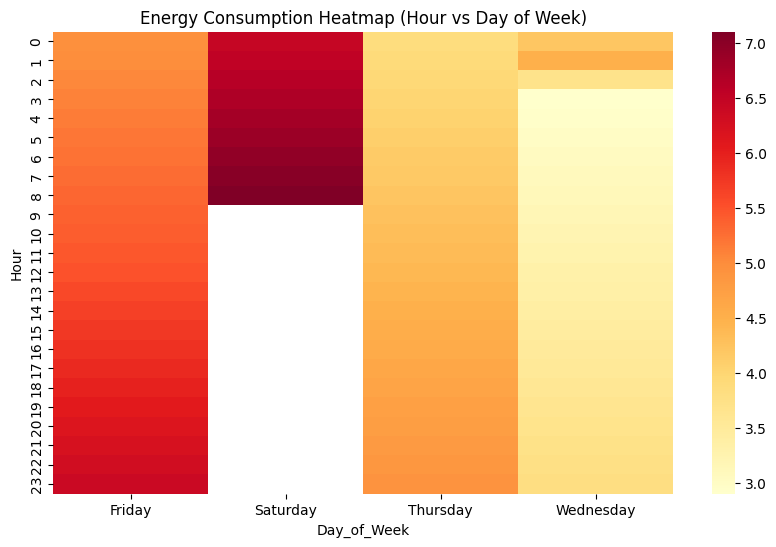

In [178]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Energy Consumption Heatmap (Hour vs Day of Week)")
plt.show()


### Exporting Cleaned Dataset

In [179]:
daily_elec.to_csv("B30581_Cleaned_Energy_Data.csv")


Based on the processed data, Saturday shows the highest average daily energy consumption at approximately 6.95 kWh, due to elevated readings in the morning hours. This pattern may reflect weekend behavioral shifts, though the sample is limited to four days with significant interpolation across gaps. Further data over multiple weeks would confirm if this trend holds consistently

In [180]:
!jupyter nbconvert --to pdf B30581_KAGYA.ipynb

[NbConvertApp] Converting notebook B30581_KAGYA.ipynb to pdf
[NbConvertApp] Support files will be in B30581_KAGYA_files/
[NbConvertApp] Making directory ./B30581_KAGYA_files
[NbConvertApp] Writing 35194 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 105379 bytes to B30581_KAGYA.pdf
